In [1]:
!make -C .. tair_regr_maps tair_ucm_maps

make: Entering directory '/mnt/c/Users/beber/FBK/0_prj/0_UHeatI/invest/published/lausanne-heat-islands'
make: Nothing to be done for 'tair_regr_maps'.
python lausanne_heat_islands/invest/make_calibrate_ucm.py data/raw/agglom-lulc.tif \
	data/interim/biophysical-table-shade.csv data/interim/invest/ref-et.nc \
	data/raw/stations/station-locations.csv data/interim/station-tair.csv data/interim/invest/calibrated-params.json		
Traceback (most recent call last):
  File "lausanne_heat_islands/invest/make_calibrate_ucm.py", line 8, in <module>
    import invest_ucm_calibration as iuc
  File "/home/ran/mambaforge/envs/new-lausanne-heat-islands/lib/python3.7/site-packages/invest_ucm_calibration/__init__.py", line 10, in <module>
    import pygeoprocessing
  File "/home/ran/mambaforge/envs/new-lausanne-heat-islands/lib/python3.7/site-packages/pygeoprocessing/__init__.py", line 13, in <module>
    from . import geoprocessing
  File "/home/ran/mambaforge/envs/new-lausanne-heat-islands/lib/python3.7

In [2]:
import pandas as pd
import seaborn as sns
import xarray as xr
from matplotlib import colors

from lausanne_heat_islands import utils

In [3]:
tair_regr_maps_filepath = '../data/processed/tair-regr-maps.nc'
tair_ucm_maps_filepath = '../data/processed/tair-ucm-maps.nc'

station_locations_filepath = '../data/raw/stations/station-locations.csv'
station_tair_filepath = '../data/interim/station-tair.csv'

In [4]:
T_regr_da = xr.open_dataarray(tair_regr_maps_filepath)
T_ucm_da = xr.open_dataarray(tair_ucm_maps_filepath)

T_diff_da = T_regr_da - T_ucm_da

station_location_df = pd.read_csv(station_locations_filepath, index_col=0)
station_tair_df = pd.read_csv(station_tair_filepath, index_col=0)
station_tair_df.index = pd.to_datetime(station_tair_df.index)

FileNotFoundError: [Errno 2] No such file or directory: b'/mnt/c/Users/beber/FBK/0_prj/0_UHeatI/invest/published/lausanne-heat-islands/data/processed/tair-ucm-maps.nc'

In [5]:
cmap = colors.ListedColormap(sns.color_palette('coolwarm'))

g = utils.plot_T_maps(T_diff_da, station_location_df, cmap=cmap)
g.fig.savefig('../reports/figures/comparison-maps.png')

NameError: name 'T_diff_da' is not defined

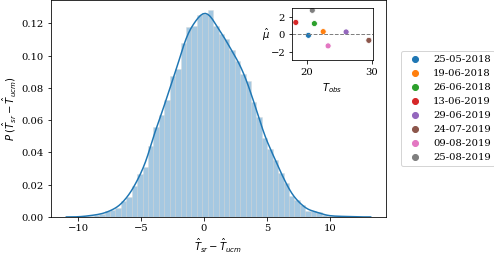

In [6]:
fig = utils.plot_comparison_hists(T_diff_da, station_tair_df)
fig.savefig('../reports/figures/comparison-hists.pdf')